In [3]:
import numpy as np
import pandas as pd
from sklearn.utils import resample
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn import model_selection
from sklearn import metrics
from sklearn.decomposition import PCA
from scipy.stats import zscore
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
df = pd.read_csv('pima-diabetes.data')

In [5]:
df

,6,148,72,35,0,33.6,0.627,50,1
0,1,85,66,29,0,26.6,0.351,31,0
1,8,183,64,0,0,23.3,0.672,32,1
2,1,89,66,23,94,28.1,0.167,21,0
3,0,137,40,35,168,43.1,2.288,33,1
4,5,116,74,0,0,25.6,0.201,30,0
...,...,...,...,...,...,...,...,...,...
762,10,101,76,48,180,32.9,0.171,63,0
763,2,122,70,27,0,36.8,0.340,27,0
764,5,121,72,23,112,26.2,0.245,30,0
765,1,126,60,0,0,30.1,0.349,47,1


In [6]:
df = pd.read_csv('pima-indians-diabetes-1.data',header=None)

In [7]:
df.head()

,0,1,2,3,4,5,6,7,8
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [8]:
values = df.values

In [9]:

df.head()

,0,1,2,3,4,5,6,7,8
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [10]:
df.shape

(768, 9)

In [11]:
model_1 = LogisticRegression()
model_2 = DecisionTreeClassifier(criterion='entropy',max_depth=5)

In [12]:
from sklearn.ensemble import BaggingClassifier
bgcl = BaggingClassifier(base_estimator=model_2,n_estimators=51)
bgcl.fit(values[:,:-1],values[:,-1])

BaggingClassifier(base_estimator=DecisionTreeClassifier(criterion='entropy',
                                                        max_depth=5),
                  n_estimators=51)

In [13]:
prod_data = values[700:,]
print(prod_data)

[[2.000e+00 1.220e+02 7.600e+01 2.700e+01 2.000e+02 3.590e+01 4.830e-01
  2.600e+01 0.000e+00]
 [6.000e+00 1.250e+02 7.800e+01 3.100e+01 0.000e+00 2.760e+01 5.650e-01
  4.900e+01 1.000e+00]
 [1.000e+00 1.680e+02 8.800e+01 2.900e+01 0.000e+00 3.500e+01 9.050e-01
  5.200e+01 1.000e+00]
 [2.000e+00 1.290e+02 0.000e+00 0.000e+00 0.000e+00 3.850e+01 3.040e-01
  4.100e+01 0.000e+00]
 [4.000e+00 1.100e+02 7.600e+01 2.000e+01 1.000e+02 2.840e+01 1.180e-01
  2.700e+01 0.000e+00]
 [6.000e+00 8.000e+01 8.000e+01 3.600e+01 0.000e+00 3.980e+01 1.770e-01
  2.800e+01 0.000e+00]
 [1.000e+01 1.150e+02 0.000e+00 0.000e+00 0.000e+00 0.000e+00 2.610e-01
  3.000e+01 1.000e+00]
 [2.000e+00 1.270e+02 4.600e+01 2.100e+01 3.350e+02 3.440e+01 1.760e-01
  2.200e+01 0.000e+00]
 [9.000e+00 1.640e+02 7.800e+01 0.000e+00 0.000e+00 3.280e+01 1.480e-01
  4.500e+01 1.000e+00]
 [2.000e+00 9.300e+01 6.400e+01 3.200e+01 1.600e+02 3.800e+01 6.740e-01
  2.300e+01 1.000e+00]
 [3.000e+00 1.580e+02 6.400e+01 1.300e+01 3.870e+0

In [14]:
prod_data.shape

(68, 9)

In [15]:
values = values[:700,]
values.shape

(700, 9)

In [16]:
prod_pred = bgcl.predict(prod_data[:,:-1]) 
prod_pred

array([0., 1., 1., 1., 0., 0., 1., 0., 1., 0., 1., 0., 1., 0., 0., 1., 1.,
       0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.,
       0., 0., 0., 0., 0., 0., 1., 0., 0., 1., 1., 0., 1., 0., 1., 1., 0.,
       0., 0., 1., 1., 1., 1., 0., 0., 1., 0., 1., 0., 0., 0., 0., 1., 0.])

In [27]:
corrmat = df.corr()
corrmat

,0,1,2,3,4,5,6,7,8
0,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
1,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
2,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
3,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
4,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
5,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
6,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
7,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
8,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


<AxesSubplot:>

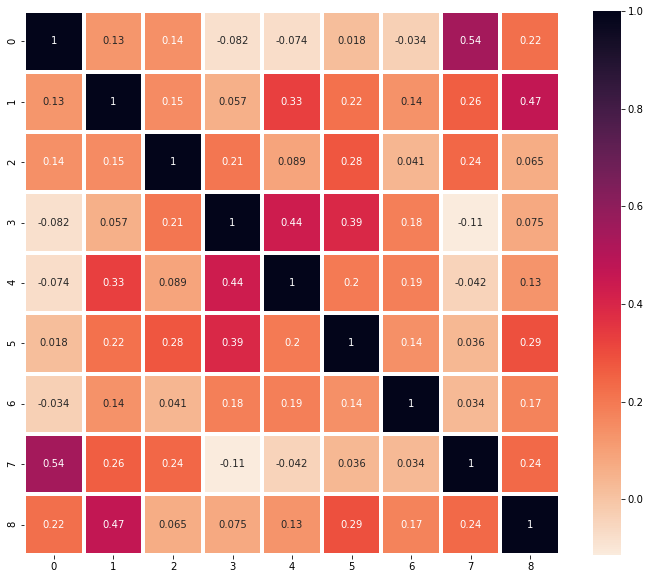

In [28]:
import seaborn as sns
top_corr_features = corrmat.index
plt.figure(figsize=(12,10))
sns.heatmap(df[top_corr_features].corr(), annot=True, cmap='rocket_r',linecolor='white',linewidth=3)

In [17]:
#Accuracy
acc = metrics.accuracy_score(prod_data[:,-1],prod_pred)
acc

0.8382352941176471

In [18]:
#Classification Report
cr = metrics.classification_report(prod_data[:,-1],prod_pred)
print(cr)

              precision    recall  f1-score   support

         0.0       0.84      0.90      0.87        41
         1.0       0.83      0.74      0.78        27

    accuracy                           0.84        68
   macro avg       0.84      0.82      0.83        68
weighted avg       0.84      0.84      0.84        68



In [19]:
from sklearn.ensemble import AdaBoostClassifier
abcl = AdaBoostClassifier(base_estimator = model_2,n_estimators = 51)
abcl.fit(values[:,:-1],values[:,-1])

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(criterion='entropy',
                                                         max_depth=5),
                   n_estimators=51)

In [20]:
y_pred_boost  =abcl.predict(prod_data[:,:-1])
y_pred_boost

array([0., 1., 1., 1., 0., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0., 1., 1.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.,
       0., 0., 0., 0., 0., 0., 1., 0., 0., 1., 1., 1., 1., 0., 1., 1., 1.,
       0., 0., 0., 0., 1., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1., 0.])

In [21]:
#Accuracy
metrics.accuracy_score(prod_data[:,-1],y_pred_boost)

0.7794117647058824

In [22]:
from sklearn.ensemble import GradientBoostingClassifier
gbcl = GradientBoostingClassifier(n_estimators = 51)
gbcl.fit(values[:,:-1],values[:,-1])

GradientBoostingClassifier(n_estimators=51)

In [36]:
y_predict=gbcl.predict(prod_data[:,:-1])
metrics.accuracy_score(prod_data[:,-1],y_predict)*100

76.47058823529412

In [37]:
cr=metrics.classification_report(prod_data[:,-1],y_predict)
print(cr)

              precision    recall  f1-score   support

         0.0       0.78      0.85      0.81        41
         1.0       0.74      0.63      0.68        27

    accuracy                           0.76        68
   macro avg       0.76      0.74      0.75        68
weighted avg       0.76      0.76      0.76        68



In [38]:
from sklearn.metrics import roc_curve, auc

Area Under the curve 82.15898825654924


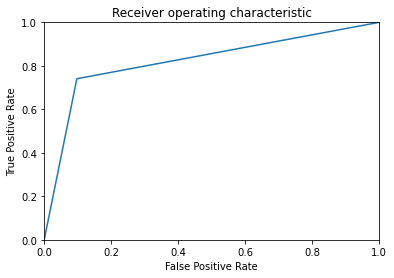

In [42]:
fpr,tpr, _ = roc_curve(prod_data[:,-1],prod_pred)
roc_auc = auc(fpr, tpr)

print('Area Under the curve',roc_auc * 100)
plt.figure()
plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.show()